In [6]:
import time

def wait(delay_amount):
    prv_t = time.perf_counter()

    while round((time.perf_counter() - prv_t) * 1000) / 1000 - 0.001 <= delay_amount:
        pass
    return time.perf_counter() - prv_t
def sleep_wait(delay_amount):
    prv_t = time.perf_counter()
    time.sleep(delay_amount)
    return time.perf_counter() - prv_t

In [53]:
wait(0.1)

0.1015010999981314

In [54]:
import typing
from typing import Callable
from time import perf_counter_ns

from apscheduler.schedulers.background import BlockingScheduler
from time import sleep
import time
import math

DELAY = 0.00324
CW = 1
CCW = 0


class StepperMotor:
    def __init__(self, DIR: int, STEP: int, steps_per_rotation: int, millis_per_angle: float = None):
        """

        :param DIR:
        :param STEP:
        :param steps_per_rotation:
        :param millis_per_angle:
        """

        self._DIR = DIR
        self._STEP = STEP
        self._steps_per_rotation = steps_per_rotation
        self._millis_per_angle = millis_per_angle
        self.angle = 0
        self._speed = 0
        self.wait_per_step = None
        self._running_continues = False
        self.sched = BlockingScheduler()

    def _step(self):
        """

        :return:
        """
        print("high")
        sleep(DELAY)
        print("low")
        sleep(DELAY)

    def move_to_angle(self, new_angle):
        """

        :param new_angle:
        :return:
        """
        rotations = (new_angle - self.angle) / 360
        steps = round(self._steps_per_rotation * rotations)
        if rotations > 0:
            pass
        else:
            steps *= -1
        for i in range(steps):
            self._step()

        self.angle = new_angle

    def get_angle(self):
        return self.angle

    def move_to_x(self, new_x):
        """
        :param new_x: in millis
        """
        if self._millis_per_angle is None:
            raise Exception("millis_per_angle is None")
        self.move_to_angle(((new_x - self.get_x()) / self._millis_per_angle))

    def _set_x(self, new_x):
        if self._millis_per_angle is None:
            raise Exception("millis_per_angle is None")
        self._set_angle(((new_x - self.get_x()) / self._millis_per_angle))

    def _set_angle(self, new_angle):
        self.angle = new_angle

    def get_x(self):
        """

        :return: x in millis
        """
        if self._millis_per_angle is None:
            raise Exception("millis_per_angle is None")
        return self.angle * self._millis_per_angle

    def _dist_to_steps(self, dist):
        return round(dist * self._steps_per_rotation / (self._millis_per_angle * 360))

    def move(self, dist, duration):
        """
        move dist in duration
        :param dist: the distance in millis
        :param duration: the time to move
        """
        starting_time = time.perf_counter()
        if dist == 0:
            return
        if duration == 0:
            self.move_to_x(self.get_x() + dist)
        num_of_steps = self._dist_to_steps(dist)
        wait_time = duration / num_of_steps
        for i in range(num_of_steps):
            cur_time = time.perf_counter()
            self._step()
            #wait_time = (duration - (time.time() - starting_time))/(num_of_steps-i)
            print(f"{i} wait time = {wait_time}\t time left = {duration - (time.perf_counter() - starting_time)}\t steps left = {num_of_steps-i}")
            before = time.perf_counter()
            wait(wait_time - (time.perf_counter() - cur_time))
            print(f"sleep time = {time.perf_counter() - before}, intended = {wait_time - (time.perf_counter() - cur_time)}")

        self._set_x(self.get_x()+dist)


In [55]:
stepper = StepperMotor(None, None, 200, 0.3670875420875421)
now = time.time()
stepper.move(30,20)
time.time()-now

high
low
0 wait time = 0.4444444444444444	 time left = 19.973179999971762	 steps left = 45
sleep time = 0.41850459994748235, intended = -0.0009135555527690631
high
low
1 wait time = 0.4444444444444444	 time left = 19.528905699960887	 steps left = 44
sleep time = 0.41950539988465607, intended = -0.0007219554908159953
high
low
2 wait time = 0.4444444444444444	 time left = 19.089405399980024	 steps left = 43
sleep time = 0.4255049000494182, intended = -0.0010246555838320237
high
low
3 wait time = 0.4444444444444444	 time left = 18.634698000038043	 steps left = 42
sleep time = 0.4165046999696642, intended = -0.0011227555159065705
high
low
4 wait time = 0.4444444444444444	 time left = 18.19004529993981	 steps left = 41
sleep time = 0.41750389989465475, intended = -0.0011092555295262319
high
low
5 wait time = 0.4444444444444444	 time left = 17.752251900034025	 steps left = 40
sleep time = 0.4255051000509411, intended = -0.0012878554924908858
high
low
6 wait time = 0.4444444444444444	 time le

20.050304651260376

In [7]:
A = [ sleep_wait(0.2) for i in range(1000)]

In [8]:
B = [ wait(0.2) for i in range(1000)]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
A1 = np.array(A)
m = np.mean(A1)
s = np.std(A1)
a =(A1-m)/s
A2 = np.where((A<m),A1,1.0)

print(m,s)
plt.hist(A2, bins=300)



TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

(array([981.,   1.,   1.,   3.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

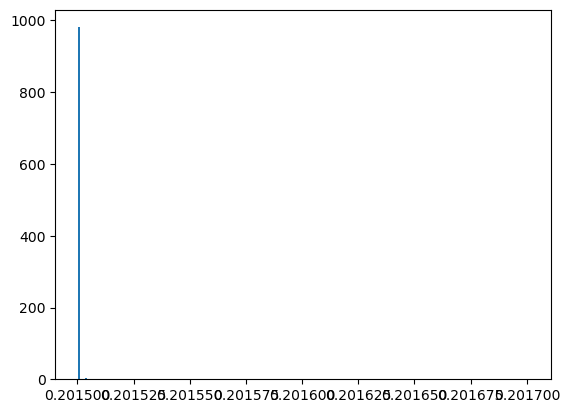

In [59]:
plt.hist(A, bins=200)
